# 연관규칙 ,연관성분석 (association analaysis) - 비지도 학습
### 대량의 데이터에 숨겨진 항목간의 연관규칙을 찾아내는 기법으로서  다른말로 장바구니 분석(market basket analysis)이라고도 한다.
### 실제 연관성 분석은 월마트, 아마존 등 여러기업에서 다양한 마케팅 활동에 활용하고 있으며 더 나아가 사회 네트워크 분석에도 활용할 수 있다.
### 빈발패턴 : 주어진 데이터 셋에서 빈발하게 발생하는 패턴을 찾아내는 기법
### 연관규칙 : 빈발패턴들 간의 연관성을 규칙으로 찾아내는 기법
### 장점
- 대규모 거래 데이터에 대해 작업을 할 수 있다.
- 이해하기 쉬운 규칙을 생성해준다.
- 데이터마이닝과 데이터 베이스에서 예상치 못한 지식을 발굴하는데 유용하다.

### 단점
- 작은 데이터셋에는 그다지 유용하지 않다
- 진정한 통찰력과 상식을 분리하기 위한 노력이 필요하다.
 
### 지지도(support) - 규칙의 중요성 - 필요조건
전체 거래중 연관성 규칙을 구성하는 항목들이 포함된 거래의 비율

support = 항목에 대한 거래수 / 전체 거래수  또는  A,B가 동시에 포함된 거래수 / 전체 거래수

### 신뢰도(confidence) - 규칙의 신뢰성 - 충분조건
항목 A를 포함하는 거래 중에서 항목 A와 항목 B가 같이 포함될 확률
연관성의 정도
             
confidence = 조건과 결과 항목을 동시에 포함하는 거래수 / 조건항목을 포함한 거래수  또는 A,B가 동시에 포함된 거래수 / A를 포함하는 거래수
                          
### 향상도(lift)
- 지지도와 신뢰도를 동시에 고려한다.
- 향상도 값이 1인 경우 조건과 결과는 우연에 의한 관계라고 보며 1보다 클수록 우연이 아닌 의미있는 연관성을 가진 규칙이라고 해석한다.
- '높은 상관 관계를 가진' 것들 만으로 추려내기 위한 지표
- 어떤 연관 규칙이 정말 연관성이 있는지 판단하려면 향상도가 1보다 큰 수치로 나타나야 함.
- 향상도 = A,B동시구매 비율 / A구매 비율*B구매 비율

lift(A -> B) = support(A -> B) / support(A) * support(B)

### 빈발항목중에서 후보집합을 선정하는 기준으로 지지도(Support) 를 사용

---

In [1]:
import pandas as pd

In [2]:
from apyori import apriori

baskets = [
    ['Milk', 'Tea', 'Cake'],
    ['Eggs', 'Tea', 'Cold Drink'],
    ['Milk', 'Eggs', 'Tea', 'Cold Drink'],
    ['Eggs', 'Cold Drink'],
    ['Juice']
]
association_result = list(apriori(baskets, min_support=0.4))

In [3]:
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)
for result in  association_result:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)
network_df.head(10)

,source,target,support
0,Eggs,Cold Drink,0.6
1,Tea,Cold Drink,0.4
2,Tea,Eggs,0.4
3,Milk,Tea,0.4


![edu1](images/edu1.png)

In [ ]:
from apyori import apriori

baskets = [
    ['Milk', 'Tea', 'Cake'],
    ['Eggs', 'Tea', 'Cold Drink'],
    ['Milk', 'Eggs', 'Tea', 'Cold Drink'],
    ['Eggs', 'Cold Drink'],
    ['Juice']
]
association_result = list(apriori(baskets, min_support=0.6))

In [ ]:
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)
for result in  association_result:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)
network_df.head(10)

![edu1](images/edu2.png)

In [4]:
import csv
with open('data/basket.csv', 'r', encoding='utf-8') as cf:
    transactions = [] 
    r = csv.reader(cf)
    for row in r:
        transactions.append(row)

In [5]:
transactions

[[' 소주', '콜라', '와인'],
 [' 소주', '오렌지주스', '콜라'],
 [' 콜라', '맥주', '와인'],
 [' 소주', '콜라', '맥주'],
 [' 오렌지주스', '와인']]

In [6]:
from apyori import apriori
rules = apriori(transactions, min_support=0.1, min_confidence=0.1)  
results = list(rules)

In [7]:
print("lhs => rhs \t\tsupport \t\tconfidence \t\tlift")
for row in results:
    support = row[1]
    ordered_stat = row[2]
    for ordered_item in ordered_stat:
        lhs = [x for x in ordered_item[0]]
        rhs = [x for x in ordered_item[1]]
        confidence = ordered_item[2]
        lift = ordered_item[3]
        if len(lhs) == 1 and len(rhs) == 1 :
            print(lhs, " => ", rhs, "\t\t{:>5.4f}\t\t{:>5.4f}\t\t{:>5.4f}".format(support, confidence, lift))    

lhs => rhs 		support 		confidence 		lift
[' 소주']  =>  ['맥주'] 		0.2000		0.3333		0.8333
['맥주']  =>  [' 소주'] 		0.2000		0.5000		0.8333
[' 소주']  =>  ['오렌지주스'] 		0.2000		0.3333		1.6667
['오렌지주스']  =>  [' 소주'] 		0.2000		1.0000		1.6667
[' 소주']  =>  ['와인'] 		0.2000		0.3333		0.5556
['와인']  =>  [' 소주'] 		0.2000		0.3333		0.5556
[' 소주']  =>  ['콜라'] 		0.6000		1.0000		1.6667
['콜라']  =>  [' 소주'] 		0.6000		1.0000		1.6667
[' 오렌지주스']  =>  ['와인'] 		0.2000		1.0000		1.6667
['와인']  =>  [' 오렌지주스'] 		0.2000		0.3333		1.6667
[' 콜라']  =>  ['맥주'] 		0.2000		1.0000		2.5000
['맥주']  =>  [' 콜라'] 		0.2000		0.5000		2.5000
[' 콜라']  =>  ['와인'] 		0.2000		1.0000		1.6667
['와인']  =>  [' 콜라'] 		0.2000		0.3333		1.6667
['맥주']  =>  ['와인'] 		0.2000		0.5000		0.8333
['와인']  =>  ['맥주'] 		0.2000		0.3333		0.8333
['맥주']  =>  ['콜라'] 		0.2000		0.5000		0.8333
['콜라']  =>  ['맥주'] 		0.2000		0.3333		0.8333
['오렌지주스']  =>  ['콜라'] 		0.2000		1.0000		1.6667
['콜라']  =>  ['오렌지주스'] 		0.2000		0.3333		1.6667
['와인']  =>  ['콜라'] 		0.2000		0.3333		0.5556
['콜

In [8]:
print("lhs => rhs \t\tsupport \t\tconfidence \t\tlift")
for row in results:
    support = row[1]
    ordered_stat = row[2]
    for ordered_item in ordered_stat:
        lhs = [x for x in ordered_item[0]]
        rhs = [x for x in ordered_item[1]]
        confidence = ordered_item[2]
        lift = ordered_item[3]
        print(lhs, " => ", rhs, "\t\t{:>5.4f}\t\t{:>5.4f}\t\t{:>5.4f}".format(support, confidence, lift))
    print("-------------------------------------------------------------------------")

lhs => rhs 		support 		confidence 		lift
[]  =>  [' 소주'] 		0.6000		0.6000		1.0000
-------------------------------------------------------------------------
[]  =>  [' 오렌지주스'] 		0.2000		0.2000		1.0000
-------------------------------------------------------------------------
[]  =>  [' 콜라'] 		0.2000		0.2000		1.0000
-------------------------------------------------------------------------
[]  =>  ['맥주'] 		0.4000		0.4000		1.0000
-------------------------------------------------------------------------
[]  =>  ['오렌지주스'] 		0.2000		0.2000		1.0000
-------------------------------------------------------------------------
[]  =>  ['와인'] 		0.6000		0.6000		1.0000
-------------------------------------------------------------------------
[]  =>  ['콜라'] 		0.6000		0.6000		1.0000
-------------------------------------------------------------------------
[]  =>  [' 소주', '맥주'] 		0.2000		0.2000		1.0000
[' 소주']  =>  ['맥주'] 		0.2000		0.3333		0.8333
['맥주']  =>  [' 소주'] 		0.2000		0.5000		0.8333
---------------

In [9]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [10]:
dataset= [['양말','팬티','신발'],
         ['신발','바지','팬티','셔츠'],
         ['모자','양말','신발'],
         ['신발','바지','팬티','장갑']]

In [11]:
t = TransactionEncoder()
t_a = t.fit(dataset).transform(dataset)
print(type(t_a))
df = pd.DataFrame(t_a, columns = t.columns_)
df

<class 'numpy.ndarray'>


,모자,바지,셔츠,신발,양말,장갑,팬티
0,False,False,False,True,True,False,True
1,False,True,True,True,False,False,True
2,True,False,False,True,True,False,False
3,False,True,False,True,False,True,True


In [12]:
frequent = apriori(df, min_support=0.5, use_colnames=True)
frequent

,support,itemsets
0,0.50,(바지)
1,1.00,(신발)
2,0.50,(양말)
3,0.75,(팬티)
4,0.50,"(바지, 신발)"
5,0.50,"(바지, 팬티)"
6,0.50,"(신발, 양말)"
7,0.75,"(신발, 팬티)"
8,0.50,"(바지, 신발, 팬티)"


In [13]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent, metric='confidence', min_threshold=0.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(바지),(신발),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
1,(신발),(바지),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
2,(바지),(팬티),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
3,(팬티),(바지),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
4,(신발),(양말),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
5,(양말),(신발),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
6,(신발),(팬티),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
7,(팬티),(신발),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
8,"(바지, 신발)",(팬티),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
9,"(바지, 팬티)",(신발),0.50,1.00,0.50,1.000000,1.000000,0.000,inf


https://patents.google.com/patent/KR101595961B1/ko

# 트위터 API로 연관 키워드 분석하기

### 바로가기

- [<Step1. API 호출> : 트위터 API로 데이터 가져오기](#<Step1.-API-호출>-:-트위터-API로-데이터-가져오기)
    - [API 데이터로 데이터 프레임 생성하기]
- [<Step2. 추출> : 키워드 추출](#<Step2.-추출>-:-키워드-추출)
    - [텍스트 데이터 전처리]
    - [nltk, konlpy를 이용한 키워드 추출]
- [<Step3. 분석> : 연관 분석을 이용한 키워드 분석](#<Step3.-분석>-:-연관-분석을-이용한-키워드-분석)
    - [연관 키워드 추출하기]
    - [단어 빈도 추출하기]
- [<Step4. 시각화> : 연관 키워드 네트워크 시각화](#<Step4.-시각화>-:-연관-키워드-네트워크-시각화)
    - [연관 키워드 네트워크 시각화]

-----

In [14]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. API 호출> : 트위터 API로 데이터 가져오기

### [API 데이터로 데이터 프레임 생성하기]

-----

##### 트위터 API 가져오기

In [15]:
import tweepy
import pandas as pd

# 발급 완료된 키를 {your_key} 대신 입력합니다.
CONSUMER_KEY = "RvnZeIl8ra88reu8fm23m0bST"
CONSUMER_SECRET = "wTRylK94GK2KmhZUnqXonDaIszwAsS6VPvpSsIo6EX5GQLtzQo"
ACCESS_TOKEN_KEY = "959614462004117506-dkWyZaO8Bz3ZXh73rspWfc1sQz0EnDU"
ACCESS_TOKEN_SECRET = "rxDWfg7uz1yXMTDwijz0x90yWhDAnmOM15R6IgC8kmtTe"

# 개인정보 인증을 요청하는 Handler입니다.
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# 인증 요청을 수행합니다.
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

# twitter API를 사용하기 위한 준비입니다.
api = tweepy.API(auth)

-----

##### '코로나' 키워드 검색

In [16]:
keyword = "코로나"
tweets = api.search(keyword)
for tweet in tweets:
    print(tweet.text)
    print(tweet.entities['user_mentions'])
    print(tweet.entities['hashtags'])
    print(tweet.created_at)

RT @treasuremembers: 여러분들 안녕하세요!! 다들 코로나 조심하고 계시죠??
너무 보고 싶었어요 😭😭😭😭 
저희들만의 공간이 드디어 개설되었어요! 앞으로 많이 여러분들과 공유 할테니까 많이 봐주세요!! 사랑해요 ❤️❤️
#박정우 #P…
[{'screen_name': 'treasuremembers', 'name': 'TREASURE', 'id': 1240627844868268033, 'id_str': '1240627844868268033', 'indices': [3, 19]}]
[{'text': '박정우', 'indices': [132, 136]}]
2021-04-12 08:48:18
RT @ecolibertas: [단독] 코로나 백신 맞으면 '5인 제한'에서 빠진다 https://t.co/wL8cYz7ajr
[{'screen_name': 'ecolibertas', 'name': 'Montani semper liberi', 'id': 919435176555327489, 'id_str': '919435176555327489', 'indices': [3, 15]}]
[]
2021-04-12 08:48:18
RT @treasuremembers: 여러분들 안녕하세요!! 다들 코로나 조심하고 계시죠??
너무 보고 싶었어요 😭😭😭😭 
저희들만의 공간이 드디어 개설되었어요! 앞으로 많이 여러분들과 공유 할테니까 많이 봐주세요!! 사랑해요 ❤️❤️
#박정우 #P…
[{'screen_name': 'treasuremembers', 'name': 'TREASURE', 'id': 1240627844868268033, 'id_str': '1240627844868268033', 'indices': [3, 19]}]
[{'text': '박정우', 'indices': [132, 136]}]
2021-04-12 08:48:17
RT @Mylife_KTV: 📌코로나19 대응 특별방역점검회의 브리핑 (21.4.12. KTV LIVE) #코로나19 #특별방역점검회의 #중앙재난안전대

-----

##### 데이터 프레임 형태로 수집

In [17]:
# 크롤링된 데이터를 저장할 데이터 프레임입니다.
columns = ['created', 'tweet_text']
df = pd.DataFrame(columns=columns)

# twitter API를 사용하여 ‘손흥민’이 포함된 100페이지의 트윗들을 크롤링한 뒤, ‘text’, ‘created_at’ 정보를 데이터 프레임으로 저장합니다.
#for i in range(1,100):
tweets = api.search(keyword)
for tweet in tweets:
        tweet_text = tweet.text
        created = tweet.created_at
        row = [created, tweet_text]
        series = pd.Series(row, index=df.columns)
        df = df.append(series, ignore_index=True)
print("Get data complete..")

Get data complete..


In [18]:
df.to_csv("data/tweet_temp.csv", index=False)

-----

# <Step2. 추출> : 키워드 추출

### [텍스트 데이터 전처리]

In [19]:
df = pd.read_csv("data/tweet_temp.csv")
df.head()

,created,tweet_text
0,2021-04-12 08:48:18,RT @treasuremembers: 여러분들 안녕하세요!! 다들 코로나 조심하고 ...
1,2021-04-12 08:48:18,RT @ecolibertas: [단독] 코로나 백신 맞으면 '5인 제한'에서 빠진다...
2,2021-04-12 08:48:17,RT @treasuremembers: 여러분들 안녕하세요!! 다들 코로나 조심하고 ...
3,2021-04-12 08:48:17,RT @Mylife_KTV: 📌코로나19 대응 특별방역점검회의 브리핑 (21.4.1...
4,2021-04-12 08:48:14,"RT @happy_CSR_: 정은경 청장, "" 오세훈의 서울형 사회적 거리두기 지침..."


In [20]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [21]:
# ‘tweet_text’ 피처에 이를 적용합니다.
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

,created,tweet_text,ko_text
0,2021-04-12 08:48:18,RT @treasuremembers: 여러분들 안녕하세요!! 다들 코로나 조심하고 ...,여러분들 안녕하세요 다들 코로나 조심하고 계시죠너무 보고 싶었어요 저희들만의 ...
1,2021-04-12 08:48:18,RT @ecolibertas: [단독] 코로나 백신 맞으면 '5인 제한'에서 빠진다...,단독 코로나 백신 맞으면 인 제한에서 빠진다
2,2021-04-12 08:48:17,RT @treasuremembers: 여러분들 안녕하세요!! 다들 코로나 조심하고 ...,여러분들 안녕하세요 다들 코로나 조심하고 계시죠너무 보고 싶었어요 저희들만의 ...
3,2021-04-12 08:48:17,RT @Mylife_KTV: 📌코로나19 대응 특별방역점검회의 브리핑 (21.4.1...,코로나 대응 특별방역점검회의 브리핑 코로나 특별방역점검회의 중앙재난안전대책...
4,2021-04-12 08:48:14,"RT @happy_CSR_: 정은경 청장, "" 오세훈의 서울형 사회적 거리두기 지침...",정은경 청장 오세훈의 서울형 사회적 거리두기 지침 예고에 유흥시설에 대한 집합금...


-----

### [konlpy를 이용한 키워드 추출]

In [22]:
from konlpy.tag import Okt
from collections import Counter

# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "data/korean_stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [23]:
# ‘ko_text’ 피처에 이를 적용합니다.
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(15, 4)


,created,tweet_text,ko_text,nouns
0,2021-04-12 08:48:18,RT @treasuremembers: 여러분들 안녕하세요!! 다들 코로나 조심하고 ...,여러분들 안녕하세요 다들 코로나 조심하고 계시죠너무 보고 싶었어요 저희들만의 ...,"[코로나, 계시, 보고, 공간, 개설, 공유, 사랑, 박정우]"
1,2021-04-12 08:48:18,RT @ecolibertas: [단독] 코로나 백신 맞으면 '5인 제한'에서 빠진다...,단독 코로나 백신 맞으면 인 제한에서 빠진다,"[단독, 코로나, 백신, 제한]"
2,2021-04-12 08:48:17,RT @treasuremembers: 여러분들 안녕하세요!! 다들 코로나 조심하고 ...,여러분들 안녕하세요 다들 코로나 조심하고 계시죠너무 보고 싶었어요 저희들만의 ...,"[코로나, 계시, 보고, 공간, 개설, 공유, 사랑, 박정우]"
3,2021-04-12 08:48:17,RT @Mylife_KTV: 📌코로나19 대응 특별방역점검회의 브리핑 (21.4.1...,코로나 대응 특별방역점검회의 브리핑 코로나 특별방역점검회의 중앙재난안전대책...,"[코로나, 대응, 특별, 방역, 점검, 회의, 브리핑, 코로나, 특별, 방역, 점검..."
4,2021-04-12 08:48:14,"RT @happy_CSR_: 정은경 청장, "" 오세훈의 서울형 사회적 거리두기 지침...",정은경 청장 오세훈의 서울형 사회적 거리두기 지침 예고에 유흥시설에 대한 집합금...,"[정은경, 청장, 오세훈, 서울, 사회, 거리, 두기, 지침, 예고, 유흥, 시설,..."


-----

# <Step3. 분석> : 연관 분석을 이용한 키워드 분석

### [연관 키워드 추출하기]

In [24]:
from apyori import apriori

##### 트위터 연관 키워드 분석

In [25]:
# 트랜잭션 데이터를 추출합니다.
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지합니다.
print(transactions)

[['코로나', '계시', '보고', '공간', '개설', '공유', '사랑', '박정우'], ['단독', '코로나', '백신', '제한'], ['코로나', '계시', '보고', '공간', '개설', '공유', '사랑', '박정우'], ['코로나', '대응', '특별', '방역', '점검', '회의', '브리핑', '코로나', '특별', '방역', '점검', '회의', '중앙', '재난', '안전', '대책', '본부', '보건복지부', '행정안전부', '질병', '관리', '식품의약품안전처', '브리핑'], ['정은경', '청장', '오세훈', '서울', '사회', '거리', '두기', '지침', '예고', '유흥', '시설', '대한', '집합', '금지', '조치', '사회', '거리', '두기', '이유', '사람', '접촉', '최대한', '코로나', '확산', '이유'], ['혈전', '증상', '확률', '코로나', '감염', '흡연', '피임', '복용', '아스', '코로나', '백신', '접종'], ['오세훈', '시정', '룸살롱', '코로나', '규제', '완화'], ['알티', '코로나', '응모'], ['코로나', '백신', '예방접종', '체크', '리스트', '접종', '재개', '아스', '백신', '백신', '예방접종', '체크', '사항', '이상일', '경우', '접종', '연기', '평소', '질환'], ['혈전', '발생', '아스', '백신', '기준', '피임', '흡연', '코로나', '감염', '만배', '한국', '신문', '선동', '둘리'], ['코로나', '대응', '특별', '방역', '점검', '회의', '브리핑', '코로나', '특별', '방역', '점검', '회의', '중앙', '재난', '안전', '대책', '본부', '보건복지부', '행정안전부', '질병', '관리', '식품의약품안전처', '브리핑'], ['오세훈', '시정', '룸살롱', '코로나', '규제', '완화'], ['코로나', '확산

In [26]:
# 연관 분석을 수행합니다.
results = list(apriori(transactions,
                       min_support=0.1,
                       min_confidence=0.2,
                       min_lift=2,
                       max_length=2))
print(results[:10])

[RelationRecord(items=frozenset({'백신', '감염'}), support=0.13333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'감염'}), items_add=frozenset({'백신'}), confidence=1.0, lift=3.75), OrderedStatistic(items_base=frozenset({'백신'}), items_add=frozenset({'감염'}), confidence=0.5, lift=3.75)]), RelationRecord(items=frozenset({'아스', '감염'}), support=0.13333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'감염'}), items_add=frozenset({'아스'}), confidence=1.0, lift=5.0), OrderedStatistic(items_base=frozenset({'아스'}), items_add=frozenset({'감염'}), confidence=0.6666666666666666, lift=5.0)]), RelationRecord(items=frozenset({'감염', '피임'}), support=0.13333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'감염'}), items_add=frozenset({'피임'}), confidence=1.0, lift=7.5), OrderedStatistic(items_base=frozenset({'피임'}), items_add=frozenset({'감염'}), confidence=1.0, lift=7.5)]), RelationRecord(items=frozenset({'혈전', '감염'}), support=0.13333333333333333

In [27]:
# 데이터 프레임 형태로 정리합니다.
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환합니다.
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head()

,source,target,support
0,백신,감염,0.133333
1,아스,감염,0.133333
2,감염,피임,0.133333
3,혈전,감염,0.133333
4,감염,흡연,0.133333


-----

### [단어 빈도 추출하기]

##### 말뭉치 추출

In [28]:
# 말뭉치를 추출합니다.
tweet_corpus = "".join(df['ko_text'].tolist())
print(tweet_corpus)

  여러분들 안녕하세요 다들 코로나 조심하고 계시죠너무 보고 싶었어요  저희들만의 공간이 드디어 개설되었어요 앞으로 많이 여러분들과 공유 할테니까 많이 봐주세요 사랑해요 박정우   단독 코로나 백신 맞으면 인 제한에서 빠진다   여러분들 안녕하세요 다들 코로나 조심하고 계시죠너무 보고 싶었어요  저희들만의 공간이 드디어 개설되었어요 앞으로 많이 여러분들과 공유 할테니까 많이 봐주세요 사랑해요 박정우   코로나 대응 특별방역점검회의 브리핑    코로나 특별방역점검회의 중앙재난안전대책본부 보건복지부 행정안전부 질병관리청 식품의약품안전처 브리핑    정은경 청장 오세훈의 서울형 사회적 거리두기 지침 예고에 유흥시설에 대한 집합금지는 불가피한 조치다 사회적 거리두기를 하는 이유는 사람 간 접촉을 최대한 줄여 코로나 확산을 막는 것에 이유가 있다 그래서 거  혈전 증상 생길 확률 코로나 감염자  흡연자  피임약 복용자  아스트라제네카 코로나 백신 접종자    오세훈 첫 시정이 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 룸살롱 코로나 규제완화얔ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ  알티하면 코로나 끝나고 원하는 콘 응모해서 이거 봄             코로나 백신 예방접종 체크리스트 월 일부터 접종 재개되는 아스트라제네카 백신백신 예방접종 전 체크해야할 사항은 뭐가 있을까요 도 이상일 경우 접종 연기하기 평소 앓고 있는 질환  혈전 발생률아스트라제네카 백신 기준피임약은 배 높고흡연은 배 높고코로나 감염은 만배 이상 높음 한국 신문의 선동에 휘둘리지 말자   코로나 대응 특별방역점검회의 브리핑    코로나 특별방역점검회의 중앙재난안전대책본부 보건복지부 행정안전부 질병관리청 식품의약품안전처 브리핑    오세훈 첫 시정이 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 룸살롱 코로나 규제완화얔ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ  코로나 확산세 안정 위해범정부 총력대응체제 가동해선제검사 적극 시

In [29]:
from konlpy.tag import Okt
from collections import Counter

# 명사 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)

# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'코로나': 18, '백신': 6, '방역': 6, '점검': 5, '여러분': 4, '대응': 4, '특별': 4, '회의': 4, '브리핑': 4, '저희': 3, '오세훈': 3, '거리': 3, '두기': 3, '아스': 3, '접종': 3, '계시': 2, '보고': 2, '공간': 2, '개설': 2, '공유': 2, '사랑': 2, '박정우': 2, '중앙': 2, '재난': 2, '안전': 2, '대책': 2, '본부': 2, '보건복지부': 2, '행정안전부': 2, '질병': 2, '관리': 2, '식품의약품안전처': 2, '사회': 2, '시설': 2, '이유': 2, '확산': 2, '혈전': 2, '감염': 2, '흡연': 2, '피임': 2, '시정': 2, '룸살롱': 2, '규제': 2, '완화': 2, '예방접종': 2, '체크': 2, '평소': 2, '단독': 1, '제한': 1, '정은경': 1, '청장': 1, '서울': 1, '지침': 1, '예고': 1, '유흥': 1, '대한': 1, '집합': 1, '금지': 1, '조치': 1, '사람': 1, '접촉': 1, '최대한': 1, '증상': 1, '확률': 1, '복용': 1, '알티': 1, '응모': 1, '리스트': 1, '재개': 1, '사항': 1, '이상일': 1, '경우': 1, '연기': 1, '질환': 1, '발생': 1, '기준': 1, '만배': 1, '이상': 1, '한국': 1, '신문': 1, '선동': 1, '둘리': 1, '안정': 1, '위해': 1, '정부': 1, '총력': 1, '체제': 1, '가동': 1, '선제': 1, '검사': 1, '적극': 1, '시행': 1, '진자': 1, '증가': 1, '취약': 1, '집중': 1, '위반': 1, '행위': 1, '대해': 1, '무관용': 1, '원칙': 1, '엄정': 1, '빈틈': 1, '차질': 1, '대통령': 1, '국면': 1, '여기': 1, '

-----

##### 단어 빈도 점수 추가

In [30]:
# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성합니다.
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 2] # 시각화의 편의를 위해 ‘nodesize’ 2 미만은 제거합니다.
node_df

,node,nodesize
0,여러분,4
1,코로나,18
2,계시,2
3,보고,2
4,저희,3
5,공간,2
6,개설,2
7,공유,2
8,사랑,2
9,박정우,2


-----

# <Step4. 시각화> : 연관 키워드 네트워크 시각화

### [연관 키워드 네트워크 시각화]

In [31]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

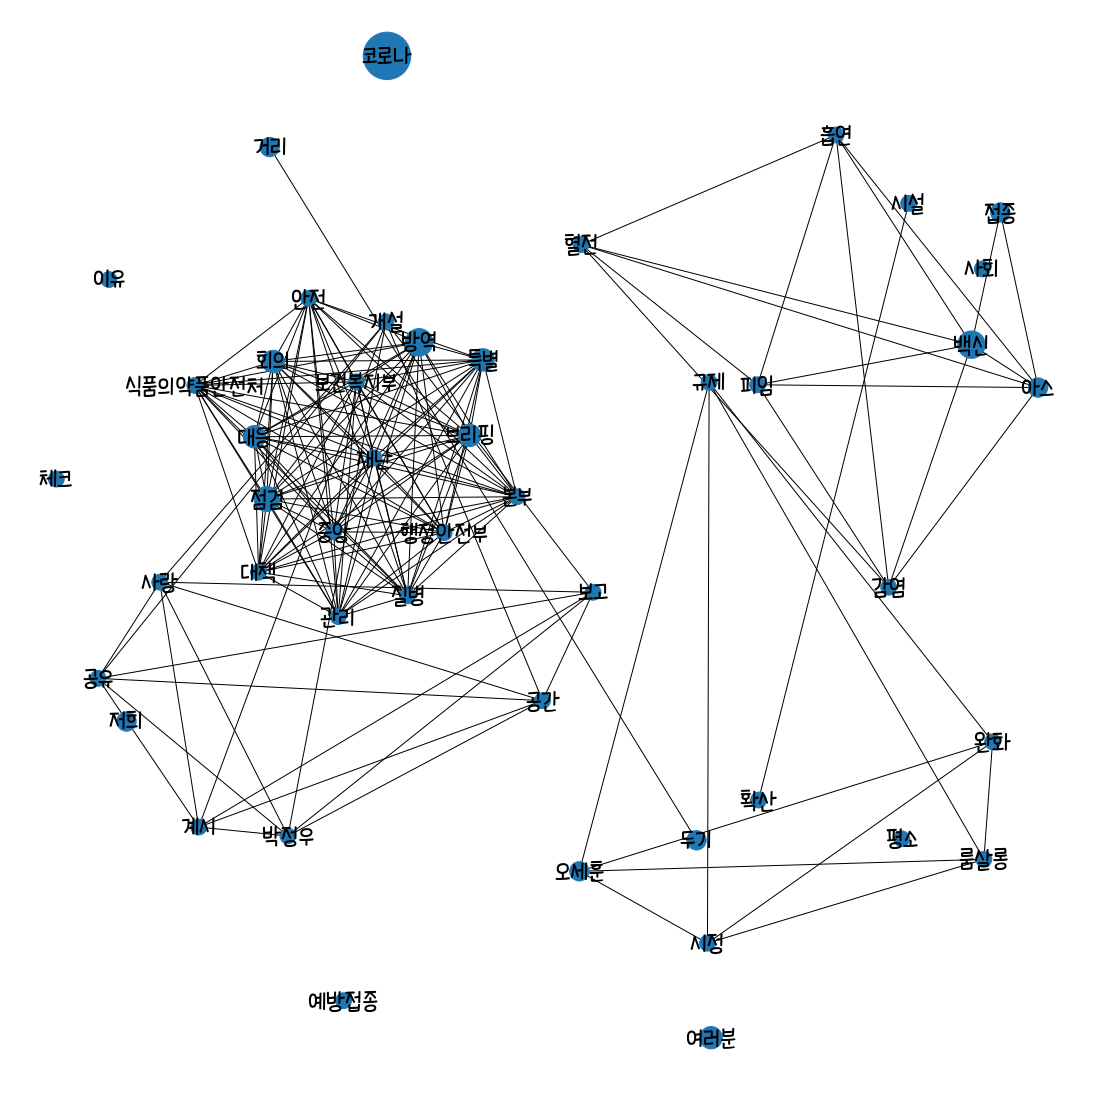

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize']*5)
    
# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    
# 그래프 디자인과 관련된 파라미터를 설정합니다.
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes)

nx.draw_networkx_labels(G, pos=pos, font_family=font_name, font_size=25)

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()